In [7]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import load_tabular_data

In [13]:
df_train, df_test, data_dict = load_tabular_data('../data/train.csv', '../data/test.csv', '../data/data_dictionary.csv')

In [4]:
df_train.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


Text(0.5, 0, 'Age')

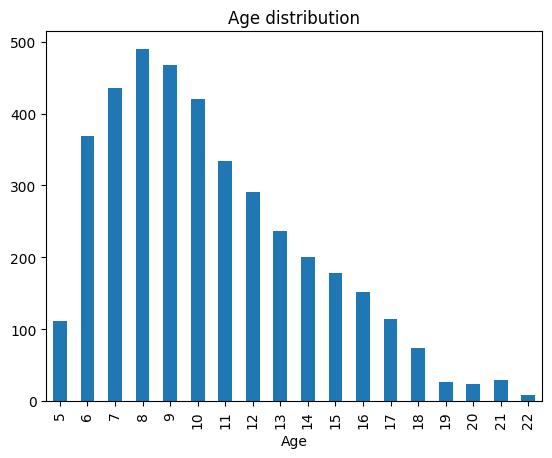

In [15]:
df_train['Basic_Demos-Age'].value_counts().sort_index().plot(kind='bar')
plt.title('Age distribution')
plt.xlabel('Age')

Text(0.5, 0, '')

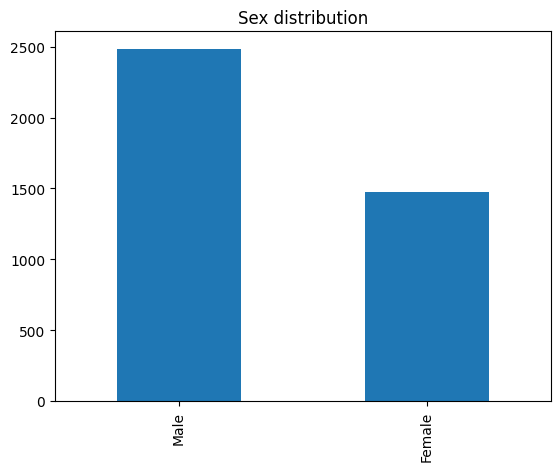

In [17]:
df_train['Basic_Demos-Sex'].value_counts().plot(kind='bar')
plt.title('Sex distribution')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('')

Text(0.5, 1.0, 'CGAS Score distribution')

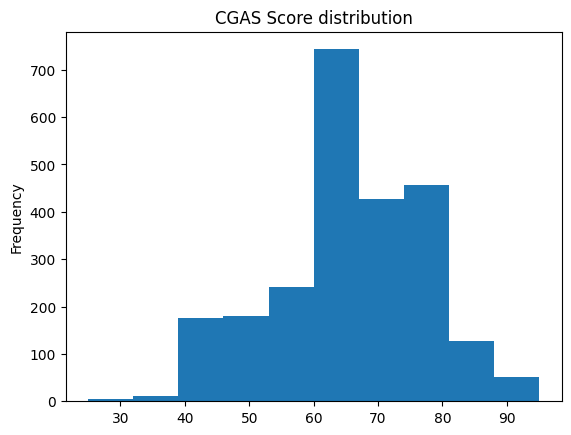

In [26]:
df_train['CGAS-CGAS_Score'][df_train['CGAS-CGAS_Score'] <= 100].plot(kind='hist', bins=10)
plt.title('CGAS Score distribution')

In [29]:
print(df_train['CGAS-CGAS_Score'].max())
print(len(df_train[df_train['CGAS-CGAS_Score'] > 100]))

999.0
1


CGAS score should be between 0 and 100. There is one extreme value in the dataset (value 999). We will remove this value, when preprocessing the data.

In [33]:
lbs_to_kg = 0.453592
inches_to_cm = 2.54

df_train['Physical-Height'] = df_train['Physical-Height'] * inches_to_cm
df_train['Physical-Weight'] = df_train['Physical-Weight'] * lbs_to_kg

In [34]:
physical_features = df_train.columns[df_train.columns.str.contains('Physical')]
df_train[physical_features].describe()

,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP
count,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000
mean,19.331929,142.104651,40.387203,27.278508,69.648951,81.597236,116.983074
std,5.113934,18.983360,20.216160,5.567287,13.611226,13.665196,17.061225
min,0.000000,83.820000,0.000000,18.000000,0.000000,27.000000,0.000000
25%,15.869350,127.000000,25.945462,23.000000,61.000000,72.000000,107.000000
50%,17.937682,139.700000,34.926584,26.000000,68.000000,81.000000,114.000000
75%,21.571244,157.480000,51.618770,30.000000,76.000000,90.500000,125.000000
max,59.132048,199.390000,142.881480,50.000000,179.000000,138.000000,203.000000


We can see that for columns `Physical-BMI`, `Physical-Weight`, `Physical-Diastolic_BP` and `Physical-Systolic_BP` minimum value is 0, which is not possible.

In [32]:
(df_train[physical_features] == 0).sum()

Physical-Season                  0
Physical-BMI                     7
Physical-Height                  0
Physical-Weight                 61
Physical-Waist_Circumference     0
Physical-Diastolic_BP            1
Physical-HeartRate               0
Physical-Systolic_BP             1
dtype: int64

`Physical-Systolic_BP` should be higher than `Physical-Diastolic_BP`. We will remove the values where `Physical-Systolic_BP` is lower than `Physical-Diastolic_BP`.

In [35]:
(df_train['Physical-Systolic_BP'] < df_train['Physical-Diastolic_BP']).sum()

3